In [1]:
import sys

sys.path.append("/workspaces/PheNet-Traffic_light")

In [2]:
from test_code.utils import *
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/traits/etsconfig/etsconfig.py:428: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


In [3]:
calib = read_calib_file('/workspaces/PheNet-Traffic_light/test_code/data/rel/000172_calib.txt')

In [4]:
P1 = calib['P1'].reshape(3, 4)

In [5]:
P3 = calib['P3'].reshape(3, 4)

In [6]:
def project_point(K, X, Y, Z):
    fx, fy = K[0, 0], K[1, 1]  # Focal length
    cx, cy = K[0, 2], K[1, 2]  # Principal point
    s = K[0, 1]                # Skew factor
    
    u = (fx*X/Z + cx)  # Tính tọa độ điểm trên trục ngang (x)
    v = (fy*Y/Z + cy)         # Tính tọa độ điểm trên trục dọc (y)
    
    return u, v

In [7]:
def intrinsic_from_fov(height, width, fov=90, is_homogenous=False):
    """
    Basic Pinhole Camera Model
    intrinsic params from fov and sensor width and height in pixels
    Returns:
        K:      [3, 3]
    """
    px, py = (width / 2, height / 2)
    hfov = fov / 360. * 2. * np.pi
    fx = width / (2. * np.tan(hfov / 2.))

    vfov = 2. * np.arctan(np.tan(hfov / 2) * height / width)
    fy = height / (2. * np.tan(vfov / 2.))

    if is_homogenous:
        return np.array([[fx, 0, px, 0],
                     [0, fy, py, 0],
                     [0, 0, 1., 0],
                     [0, 0, 0, 1.]])

    return np.array([[fx, 0, px],
                     [0, fy, py],
                     [0, 0, 1.]])

In [8]:
def project_point_v1(K, point_3d):
    point_2d = np.dot(K, point_3d)
    u = point_2d[0] / point_2d[2]
    v = point_2d[1] / point_2d[2]
    return u, v

In [9]:
rgb = cv2.cvtColor(cv2.imread('/workspaces/PheNet-Traffic_light/test_code/data/rel/000172_image.png'), cv2.COLOR_BGR2RGB)
img_height, img_width, img_channel = rgb.shape

In [10]:
K = intrinsic_from_fov(img_height, img_width, fov=90)

In [11]:
labels = load_label('/workspaces/PheNet-Traffic_light/test_code/data/rel/000172_label.txt')

In [12]:
label = labels[0].in_camera_coordinate(is_homogenous=False)
X, Y, Z = label

In [13]:
u, v = project_point(K, X, Y, Z)
print(u, v)

[973.83256922] [134.40642053]


In [14]:
point_3d = labels[0].in_camera_coordinate(is_homogenous=True)
point_3d

array([[ 7.82601992],
       [-1.17764471],
       [13.77412062],
       [ 1.        ]])

In [15]:
K_3d = intrinsic_from_fov(img_height, img_width, fov=90, is_homogenous=True)

In [16]:
u, v = project_point_v1(K_3d, point_3d)
print(u, v)

[973.83256922] [134.40642053]


In [17]:
import matplotlib.pyplot as plt

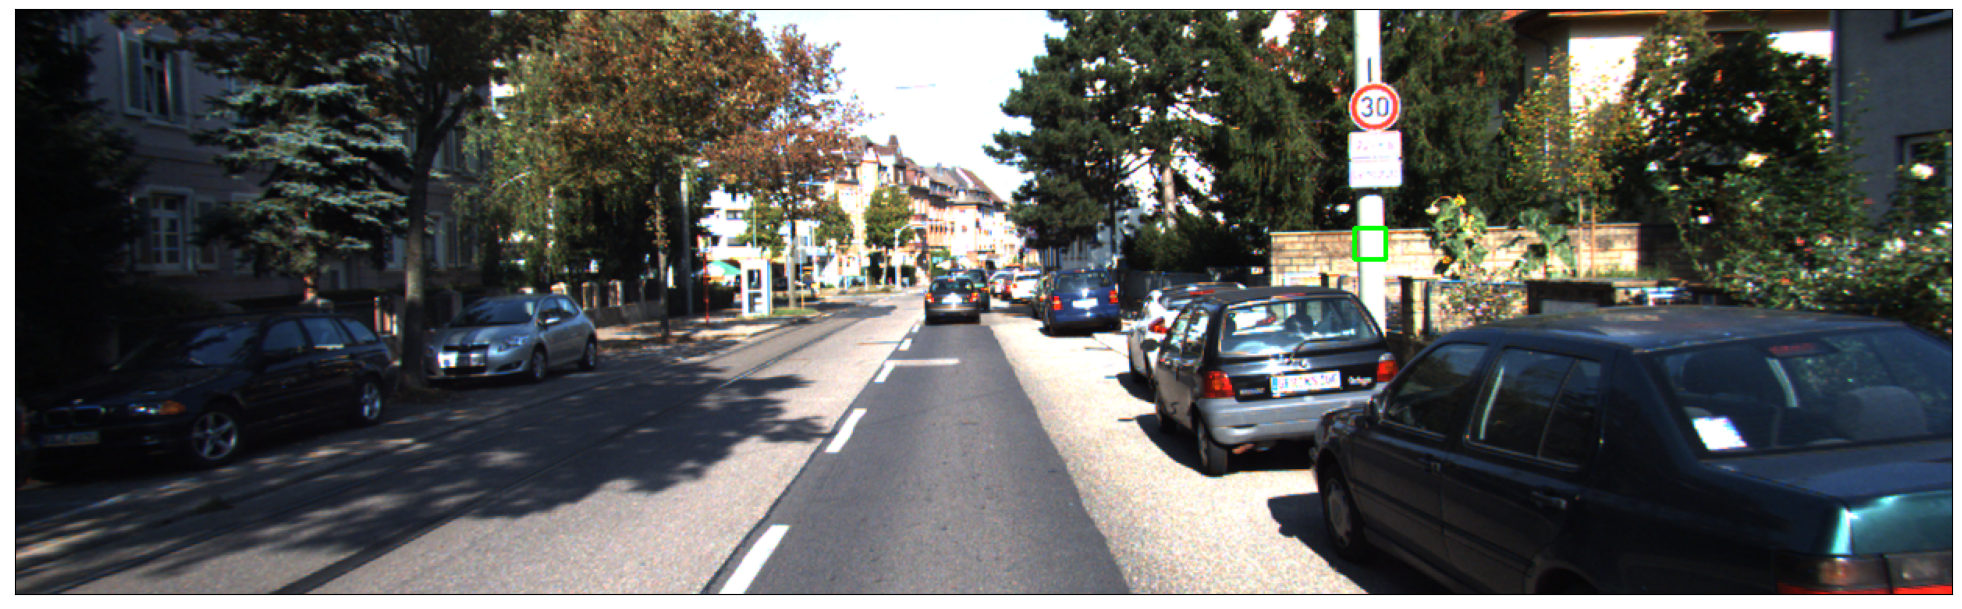

In [23]:
labels = load_label('/workspaces/PheNet-Traffic_light/test_code/data/rel/000172_label.txt')
label = labels[0].in_camera_coordinate(is_homogenous=False)
X, Y, Z = label
K = intrinsic_from_fov(img_height, img_width, fov=110)
rgb = cv2.cvtColor(cv2.imread('/workspaces/PheNet-Traffic_light/test_code/data/rel/000172_image.png'), cv2.COLOR_BGR2RGB)
u, v = project_point(K, X, Y, Z)
x1 = int(u - 10)
y1 = int(v - 10)
x2 = int(u + 10)
y2 = int(v + 10)

# Khoanh vùng hình chữ nhật bằng cách vẽ đường bao quanh
cv2.rectangle(rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(25, 13))
plt.imshow(rgb)
plt.yticks([])
plt.xticks([])
plt.show()